In [20]:
import os
import json
import matplotlib.pyplot as plt

# read in a json file and save it inside a pandas datframe
dir_name = 'results/Mishra_Neha/processed/'
# Define helper functions
def get_paper(dir_name):
    return [os.path.join(dir_name, file_name) for file_name in os.listdir(dir_name)]

def get_number_of_papers(dir_name):
    return len(os.listdir(dir_name))

def get_paper_data(file_names):
    results = []
    for file_name in file_names:
        with open(file_name, 'r') as file:
            data = json.load(file)
            results.append(data)
    return results

def get_authors(data):
    authors = []
    for entry in data:
        authors.append(entry['FAU'])
    return authors

data = get_paper_data(get_paper(dir_name))
authors = get_authors(data)

In [33]:
import networkx as nx

G = nx.Graph()
# construct the graph
for author_list in authors:
    for author in author_list:
        G.add_node(author)
    for i in range(len(author_list)):
        for j in range(i+1, len(author_list)):
            G.add_edge(author_list[i], author_list[j])

print(G)

Graph with 847 nodes and 14258 edges


/home/tom-ruge/anaconda3/envs/fall/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



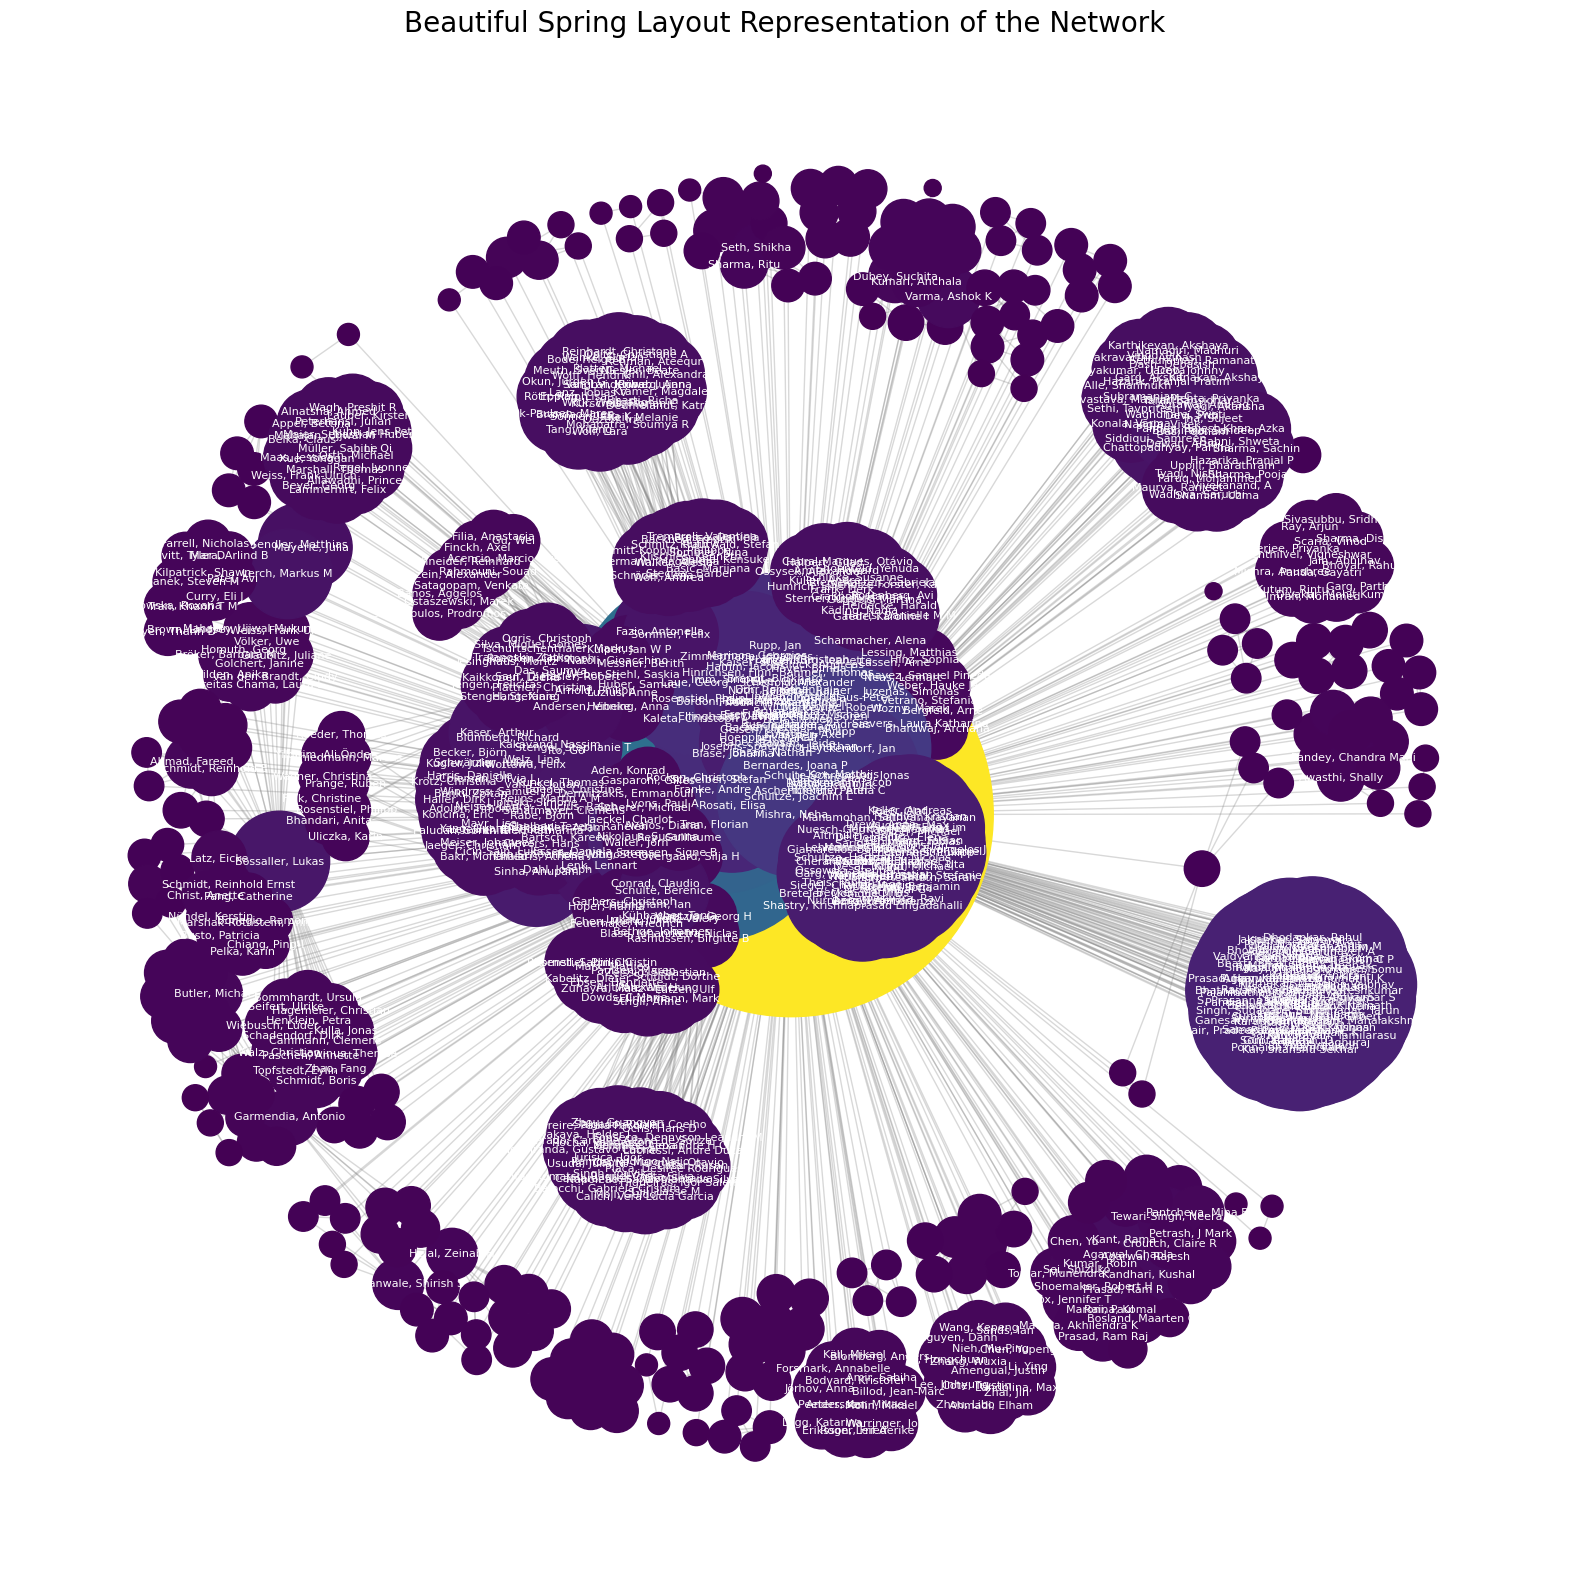

In [47]:
# Configure the spring layout with increased iterations for better layout quality
pos = nx.spring_layout(G, seed=42, k=0.15, iterations=100)

# Set up node colors based on degree
node_degree = [G.degree(n) for n in G.nodes()]
node_colors = plt.cm.viridis([deg / max(node_degree) for deg in node_degree])  # Normalize to colormap

# Set node sizes based on degree (scale appropriately)
node_sizes = [50 + 100 * G.degree(n) for n in G.nodes()]

# Draw the network with the styling options
plt.figure(figsize=(20, 20))
nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color='gray')
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis)
nx.draw_networkx_labels(G, pos, labels={n: n for n in G.nodes() if G.degree(n) > 10}, font_size=8, font_color='white')

# Additional plot settings
plt.title("Beautiful Spring Layout Representation of the Network", fontsize=20)
plt.axis('off')  # Turn off the axis for a cleaner look
plt.show()

In [52]:
def get_authors(data):
    authors = []
    for entry in data:
        authors.append(entry['FAU'])
    return authors

def plot_network(data):
    import networkx as nx
    import plotly.graph_objects as go

    # Get the authors from the data
    authors = get_authors(data)
    # initialize the graph
    G = nx.Graph()
    # construct the graph
    for author_list in authors:
        for author in author_list:
            G.add_node(author)
        for i in range(len(author_list)):
            for j in range(i+1, len(author_list)):
                G.add_edge(author_list[i], author_list[j])
    # Configure the spring layout
    pos = nx.spring_layout(G, seed=42, k=0.15, iterations=100)

    # Get node degrees for coloring and sizing
    node_degree = [G.degree(n) for n in G.nodes()]
    max_degree = max(node_degree)

    # Normalize node sizes
    node_sizes = [10 + 40 * (deg / max_degree) for deg in node_degree]  # Scale node sizes for better visibility

    # Create edge traces
    edge_x = []
    edge_y = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines'
    )

    # Create node traces
    node_x = []
    node_y = []
    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        marker=dict(
            size=node_sizes,
            color=node_degree,  # Use degree for color scaling
            colorscale='Viridis',  # Use a predefined color scale
            colorbar=dict(
                title='Node Degree',
                thickness=15,
                xanchor='left',
                titleside='right'
            ),
            line_width=2
        ),
        text=[str(node) for node in G.nodes()],  # Add node labels
    )

    # Create the figure
    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(
                        title='<br>Beautiful Spring Layout Representation of the Network',
                        titlefont_size=16,
                        height=800,
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=0, l=0, r=0, t=40),
                        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                    )

    # Show the plot
    fig.show()

plot_network(data)

In [46]:
# Create the pyvis Network object
g = Network(height="750px", width="100%", bgcolor="#222222", font_color="white", notebook=True)

# Use the networkx graph
g.from_nx(G)

# Set simplified custom options
g.set_options("""
var options = {
    "layout": {
        "hierarchical": {
            "enabled": false
        }
    },
    "nodes": {
        "shape": "dot",
        "size": 10,
        "color": {
            "border": "#ffffff",
            "background": "#007bff",
            "highlight": {
                "border": "#ffffff",
                "background": "#0056b3"
            }
        },
        "font": {
            "color": "#ffffff",
            "size": 12
        }
    },
    "edges": {
        "color": {
            "color": "#ffffff",
            "highlight": "#ff0000",
            "hover": "#ff0000"
        },
        "width": 1,
        "smooth": {
            "enabled": true,
            "type": "continuous"
        }
    },
    "physics": {
        "enabled": true
    },
    "interaction": {
        "hover": false
    }
}
""")

# Show the graph
g.show("example.html")

example.html
